In [1]:
# imports
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(7)

import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os
os.getcwd()
os.chdir("../")
%pwd

'C:\\Users\\Lenovo\\Documents\\Masters_thesis'

In [3]:
FILE_DIR = "artifacts"
FILE_PATH = "nsp1,3,5,8,9,13,15_mutation_rate_1e7_rounded_without_duplicates.csv"

In [4]:
data = pd.read_csv(os.path.join(FILE_DIR, FILE_PATH))
data.tail()

,AC,AT,AG,CA,CT,CG,TA,TC,TG,GA,GC,GT
80220,0.0,0.0,0.0,0.0,6.75790,0.0,0.0,1.12632,0.0,0.0,0.0,1.12632
80221,0.0,0.0,0.0,0.0,6.75790,0.0,0.0,0.00000,0.0,0.0,0.0,1.12632
80222,0.0,0.0,0.0,0.0,5.63158,0.0,0.0,0.00000,0.0,0.0,0.0,1.12632
80223,0.0,0.0,0.0,0.0,4.50527,0.0,0.0,1.12632,0.0,0.0,0.0,2.25263
80224,0.0,0.0,0.0,0.0,5.63158,0.0,0.0,2.25263,0.0,0.0,0.0,1.12632


In [5]:
dataset = data.values
dataset = dataset.astype('float32')

print('Dataset Shape: ', np.shape(dataset))

Dataset Shape:  (80225, 12)


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

64180 16045


In [7]:
def create_dataset(dataset, look_back, btch): 
    dataX, dataY = [], []
    z=0
    inc=1
    for i in range(0,len(dataset)-look_back,inc):
        a = dataset[i:(i+look_back)]
        
        dataX.append(np.reshape(a,(btch,12)))
        dataY.append(dataset[i+look_back])
#         print(a,dataY)
        z+=1
    return np.array(dataX), np.array(dataY)
 
btch=12    
look_back = 12
trainX, trainY = create_dataset(train, look_back, btch)
testX, testY = create_dataset(test, look_back, btch)

trainX = np.reshape(trainX, (trainX.shape[0], btch,12))
testX = np.reshape(testX, (testX.shape[0], btch, 12))
print(len(trainX), len(testX))

64168 16033


# GRU

In [8]:
model = tf.keras.Sequential()
model.add(layers.GRU(500,activation='relu', input_shape=(btch, 12))) 

model.add(layers.Dense(250))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12)) #softmax

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001))

# Train the model with the ModelCheckpoint callback
history = model.fit(trainX, trainY, validation_split=0.30, epochs=200, batch_size=256, verbose=2)

# Find the minimum validation loss and its respective training loss and epoch
min_val_loss = min(history.history['val_loss'])
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
train_loss_at_min_val_loss = history.history['loss'][min_val_loss_epoch]

# Print the results
print(f"Minimum Validation Loss: {min_val_loss} at Epoch {min_val_loss_epoch}")
print(f"Training Loss at Minimum Validation Loss: {train_loss_at_min_val_loss}")

Epoch 1/200
176/176 - 39s - loss: 0.0170 - val_loss: 0.0153 - 39s/epoch - 223ms/step
Epoch 2/200
176/176 - 38s - loss: 0.0133 - val_loss: 0.0109 - 38s/epoch - 213ms/step
Epoch 3/200
176/176 - 43s - loss: 0.0120 - val_loss: 0.0096 - 43s/epoch - 242ms/step
Epoch 4/200
176/176 - 37s - loss: 0.0115 - val_loss: 0.0090 - 37s/epoch - 212ms/step
Epoch 5/200
176/176 - 36s - loss: 0.0111 - val_loss: 0.0086 - 36s/epoch - 205ms/step
Epoch 6/200
176/176 - 35s - loss: 0.0108 - val_loss: 0.0083 - 35s/epoch - 196ms/step
Epoch 7/200
176/176 - 34s - loss: 0.0106 - val_loss: 0.0080 - 34s/epoch - 196ms/step
Epoch 8/200
176/176 - 34s - loss: 0.0103 - val_loss: 0.0077 - 34s/epoch - 193ms/step
Epoch 9/200
176/176 - 34s - loss: 0.0101 - val_loss: 0.0074 - 34s/epoch - 191ms/step
Epoch 10/200
176/176 - 34s - loss: 0.0098 - val_loss: 0.0072 - 34s/epoch - 191ms/step
Epoch 11/200
176/176 - 34s - loss: 0.0097 - val_loss: 0.0070 - 34s/epoch - 192ms/step
Epoch 12/200
176/176 - 35s - loss: 0.0094 - val_loss: 0.0068 - 

Epoch 97/200
176/176 - 37s - loss: 0.0053 - val_loss: 0.0041 - 37s/epoch - 208ms/step
Epoch 98/200
176/176 - 40s - loss: 0.0052 - val_loss: 0.0041 - 40s/epoch - 226ms/step
Epoch 99/200
176/176 - 37s - loss: 0.0052 - val_loss: 0.0041 - 37s/epoch - 210ms/step
Epoch 100/200
176/176 - 36s - loss: 0.0052 - val_loss: 0.0041 - 36s/epoch - 203ms/step
Epoch 101/200
176/176 - 34s - loss: 0.0052 - val_loss: 0.0042 - 34s/epoch - 194ms/step
Epoch 102/200
176/176 - 34s - loss: 0.0052 - val_loss: 0.0041 - 34s/epoch - 194ms/step
Epoch 103/200
176/176 - 34s - loss: 0.0052 - val_loss: 0.0041 - 34s/epoch - 194ms/step
Epoch 104/200
176/176 - 34s - loss: 0.0052 - val_loss: 0.0041 - 34s/epoch - 196ms/step
Epoch 105/200
176/176 - 35s - loss: 0.0052 - val_loss: 0.0041 - 35s/epoch - 199ms/step
Epoch 106/200
176/176 - 34s - loss: 0.0052 - val_loss: 0.0041 - 34s/epoch - 193ms/step
Epoch 107/200
176/176 - 35s - loss: 0.0052 - val_loss: 0.0041 - 35s/epoch - 197ms/step
Epoch 108/200
176/176 - 34s - loss: 0.0052 - v

Epoch 192/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0040 - 36s/epoch - 207ms/step
Epoch 193/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 205ms/step
Epoch 194/200
176/176 - 37s - loss: 0.0049 - val_loss: 0.0040 - 37s/epoch - 208ms/step
Epoch 195/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 207ms/step
Epoch 196/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 206ms/step
Epoch 197/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 205ms/step
Epoch 198/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 204ms/step
Epoch 199/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0041 - 36s/epoch - 204ms/step
Epoch 200/200
176/176 - 36s - loss: 0.0049 - val_loss: 0.0040 - 36s/epoch - 204ms/step
Minimum Validation Loss: 0.004035870544612408 at Epoch 193
Training Loss at Minimum Validation Loss: 0.004903761669993401


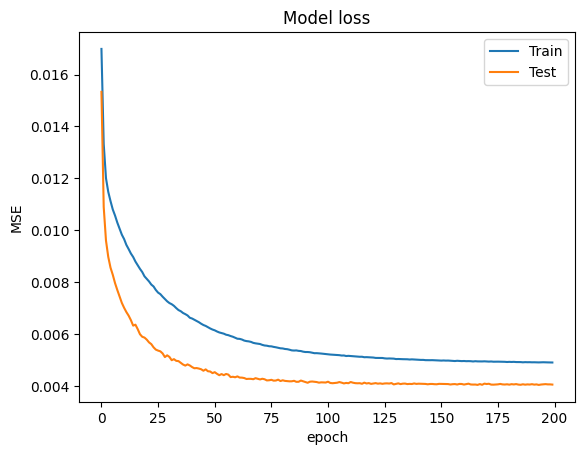

In [9]:
FOLDER_DIR = "C:\\Users\\Lenovo\\Documents\\Masters_thesis\\notebooks_7proteins\\"
plt.plot(history.history['loss'])
plt.plot(np.array(history.history['val_loss']))
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(os.path.join(FOLDER_DIR, "plots", 'gru_model_loss_plot.png'), dpi=400)
plt.show()

In [10]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

502/502 [==============================] - 12s 25ms/step


In [11]:
#calculating error

trainScore_rmse = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE: %.2f RMSE' % (trainScore_rmse))
testScore_rmse = math.sqrt(mean_squared_error(testY, testPredict))
print('Test RMSE: %.2f RMSE' % (testScore_rmse))

trainScore_mae = mean_absolute_error(trainY, trainPredict)
print('Train RMSE: %.2f MAE' % (trainScore_mae))
testScore_mae = mean_absolute_error(testY, testPredict)
print('Test RMSE: %.2f MAE' % (trainScore_mae))

trainScore_mse = mean_squared_error(trainY, trainPredict)
print('Train MSE: %.2f MSE' % (trainScore_mse))
testScore_mse = mean_squared_error(testY, testPredict)
print('Test MSE: %.2f MSE' % (trainScore_mse))

Train RMSE: 0.58 RMSE
Test RMSE: 0.68 RMSE
Train RMSE: 0.29 MAE
Test RMSE: 0.29 MAE
Train MSE: 0.34 MSE
Test MSE: 0.34 MSE


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 500)               771000    
                                                                 
 dense (Dense)               (None, 250)               125250    
                                                                 
 activation (Activation)     (None, 250)               0         
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12550     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [14]:
# FOLDER_DIR = "notebooks_nsp1,3,5,8,9,13,15"
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file=os.path.join(FOLDER_DIR, "models", "model_plot_gru.png"), 
#            show_shapes=True, show_layer_names=False, dpi='600')